In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions



In [ ]:
df = pd.read_csv('data.csv')

X = df[['x1', 'x2']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X.max().max()

### Logistic Regression

In [4]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

acc_lr = accuracy_score(y_pred, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
print(acc_lr)

0.75


[(0, 1), Text(0, 0.5, '$X_2$'), (-0.063669, 1.0), Text(0.5, 0, '$X_1$'), None]

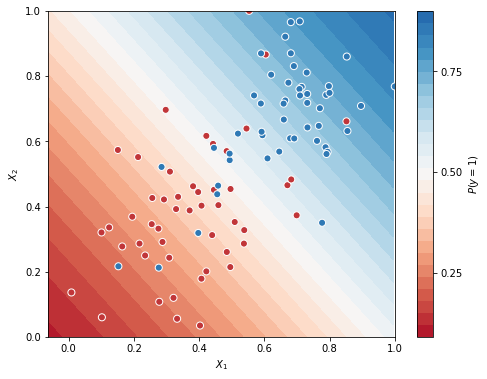

In [6]:
# plotting logistic regression decision boundary
xx, yy = np.mgrid[X.min().min():X.max().max():0.01, X.min().min():X.max().max():0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf_lr.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X['x1'], X['x2'], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min().min(), X.max().max()), ylim=(y.min(), y.max()),
       xlabel="$X_1$", ylabel="$X_2$")

### Decision Trees

In [7]:
clf_dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
acc_dt = accuracy_score(y_pred_dt, y_test)
print(acc_dt)

0.7


[(0, 1), Text(0, 0.5, '$X_2$'), (-0.063669, 1.0), Text(0.5, 0, '$X_1$'), None]

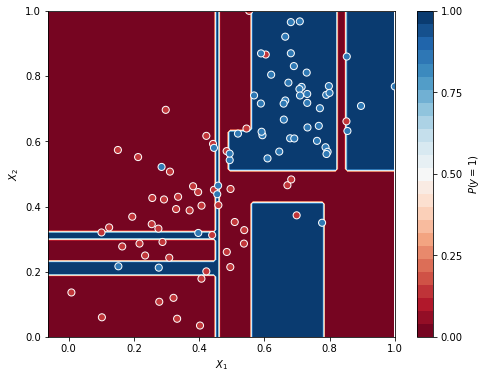

In [8]:
xx, yy = np.mgrid[X.min().min():X.max().max():0.01, X.min().min():X.max().max():0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf_dt.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X['x1'], X['x2'], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min().min(), X.max().max()), ylim=(y.min(), y.max()),
       xlabel="$X_1$", ylabel="$X_2$")

### Support Vector Machine

In [9]:
clf_svm = SVC(gamma='auto').fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
acc_svm = accuracy_score(y_pred_svm, y_test)
print(acc_svm)

0.75


Text(0.5, 1.0, 'SVM Decision Region Boundary')

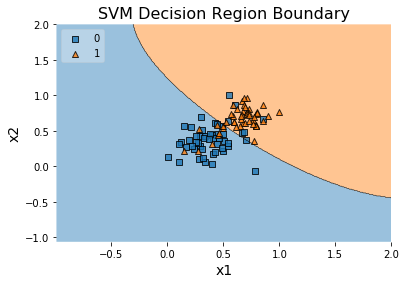

In [10]:
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf_svm, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

### Neural Network

In [11]:
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                  hidden_layer_sizes=(5, 4), random_state=1).fit(X_train,y_train)
y_pred_nn = clf_nn.predict(X_test)
acc_nn = accuracy_score(y_pred_nn, y_test)
print(acc_nn)

0.75


Text(0.5, 1.0, 'Neural Networks')

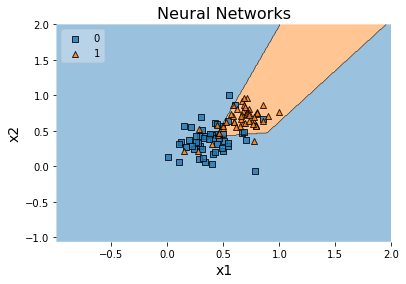

In [15]:
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf_nn, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('Neural Networks', size=16)